In [5]:
library(ggplot2)
library(igraph)

In [100]:
## Network ##

# Create the (lattice) graph
g <- make_lattice(length = 10, dim = 2)

In [101]:
## Initialization ##

# Hyperparameters
F <- 5 # Number of features
q <- 3 # Disorder parameter

# Generate the features
mode <- "pois"
if (mode == "pois") {
  features <- lapply(1:vcount(g), function(x) rpois(F, q))
} else if (mode == "unif") {
  features <- lapply(1:vcount(g), function(x) sample(1:q, F, replace = TRUE))
}

# Attach the feature to each node
V(g)$features <- features

In [102]:
# Some functions

cultural_similarity <- function(g, i, j) {
  sum(V(g)[[i]]$features == V(g)[[j]]$features)
}

cultural_differences <- function(g, i, j) {
  which(V(g)[[i]]$features != V(g)[[j]]$features)
}

In [125]:
# Calculate similarities for each edge and add as edge attribute
edge_similarities <- sapply(E(g), function(e) {
  # Get the nodes connected by the edge
  nodes <- ends(g, e)
  node1 <- nodes[1]
  node2 <- nodes[2]
  
  # Compute similarity
  cultural_similarity(g, node1, node2)
})

# Add similarity as edge attribute
E(g)$similarity <- edge_similarities

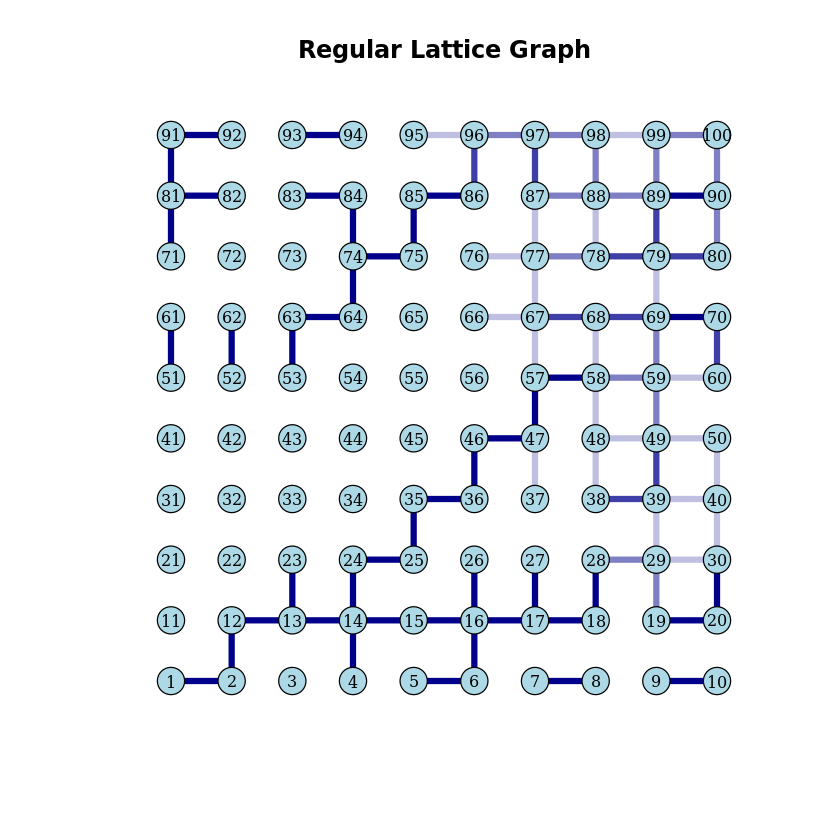

In [126]:
color_map <- colorRampPalette(c("darkblue", "white"))
edge_colors <- color_map(F)[cut(E(g)$similarity, breaks=F)]

plot(g, 
     layout=layout_on_grid(g),  # Use lattice layout for proper grid representation
     main="Regular Lattice Graph",  # Title of the plot
     vertex.size=10,  # Size of the vertices
     vertex.label.cex=0.8,  # Font size of vertex labels
     edge.color=edge_colors,  # Color of the edges
     edge.width=5,  # Size of the edges
     vertex.color="lightblue",  # Color of the vertices
     vertex.frame.color="black",  # Border color of the vertices
     vertex.label.color="black"  # Color of the vertex labels
)

In [123]:
## Dynamics ##

for(i in 1:10000) {
  # Randomly select an edge
  random_edge <- sample(E(g), 1)

  # Get the nodes
  node_i <- ends(g, random_edge)[1]
  node_j <- ends(g, random_edge)[2]

  # Compute the cultural similarity
  cs <- cultural_similarity(g, node_i, node_j)

  # Compute the probability of interaction
  p <- cs / F

  # Interaction
  if (runif(1) < p && p < 1) {
    diff <- cultural_differences(g, node_i, node_j)
    feature_to_change <- sample(diff, 1)
    V(g)[[node_j]]$features[feature_to_change] <- V(g)[[node_i]]$features[feature_to_change]
  }
}